<a href="https://colab.research.google.com/github/ikale1234/CSE151NEWS/blob/Milestone2/CSE151_Milestone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clone Directory

In [1]:
!git clone https://github.com/ikale1234/CSE151NEWS.git

Cloning into 'CSE151NEWS'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 62 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (62/62), 7.75 MiB | 3.54 MiB/s, done.
Resolving deltas: 100% (13/13), done.


### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Dataset

In [3]:
df = pd.read_csv('/content/CSE151NEWS/data/news_eval.csv', sep=';')
df

,Unnamed: 0,title,text,label
0,0,"Sanders back in U.S. Senate, blasts 'coloniali...",WASHINGTON (Reuters) - Democratic U.S. preside...,1
1,1,Kremlin: Syria peoples' congress being 'active...,MOSCOW (Reuters) - A proposal to convene a con...,1
2,2,Oregon Cop Convicted Of Shattering Biker’s Co...,"In a baffling fit of rage, an Oregon State Pol...",0
3,3,Twitter Erupts With Glee Over #CruzSexScandal...,The last thing any politician running for the ...,0
4,4,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,0
...,...,...,...,...
8112,8112,Sean Hannity Throws Hissy Fit After Real Repo...,"Just like Donald Trump, Sean Hannity has a thi...",0
8113,8113,FORMER ASST FBI DIRECTOR WARNS ANTI-TRUMP KABA...,Former Asst. FBI Director James Kallstrom spok...,0
8114,8114,John McCain: Trump’s Attacks On The Press Are...,Donald Trump has declared the media to be the...,0
8115,8115,Syria's Deir al-Zor air base working again: st...,BEIRUT (Reuters) - The Deir al-Zor military ai...,1


### Data Observation Steps

Feature Information:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8117 entries, 0 to 8116
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8117 non-null   int64 
 1   title       8117 non-null   object
 2   text        8117 non-null   object
 3   label       8117 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 253.8+ KB


Counting Null Values:

In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


Analyzing Data Entry Size and Label Information:

In [6]:
df.describe()

,Unnamed: 0,label
count,8117.000000,8117.000000
mean,4058.000000,0.531477
std,2343.320401,0.499039
min,0.000000,0.000000
25%,2029.000000,0.000000
50%,4058.000000,1.000000
75%,6087.000000,1.000000
max,8116.000000,1.000000


Word Count of Titles:

In [7]:
df['title words'] = df['title'].apply(lambda x: len(x.split(' ')))
display(df['title words']), display(df['title words'].describe())

,title words
0,10
1,7
2,15
3,9
4,15
...,...
8112,16
8113,13
8114,14
8115,10


,title words
count,8117.000000
mean,12.093754
std,3.896607
min,1.000000
25%,9.000000
50%,11.000000
75%,14.000000
max,45.000000


(None, None)

Word Count of Article Text:

In [8]:
df['text words'] = df['text'].apply(lambda x: len(x.split(' ')))
display(df['text words']), display(df['text words'].describe())

,text words
0,340
1,92
2,526
3,451
4,24
...,...
8112,595
8113,200
8114,335
8115,227


,text words
count,8117.000000
mean,407.745596
std,320.516715
min,1.000000
25%,207.000000
50%,368.000000
75%,517.000000
max,7304.000000


(None, None)

Graphical Representation of Distribution of Labels:

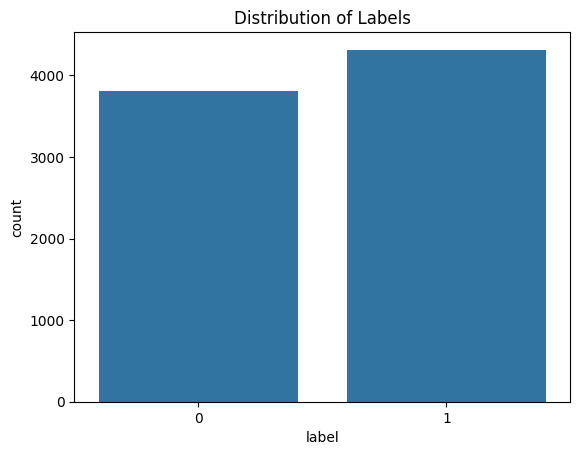

In [9]:
sns.countplot(data=df, x='label')
plt.title('Distribution of Labels')
plt.show()

Graphical Representation of Title and Text Lengths:

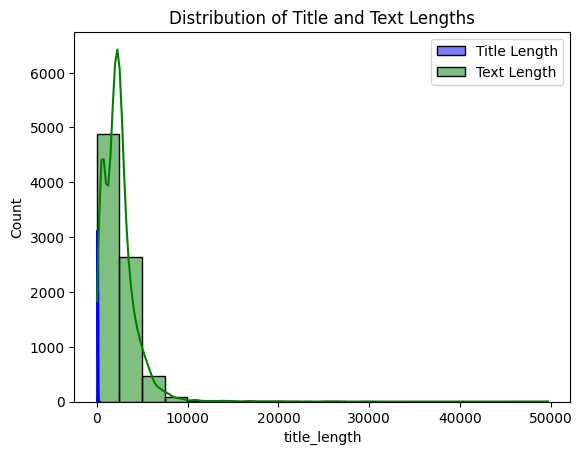

In [10]:
df['title_length'] = df['title'].apply(len)
df['text_length'] = df['text'].apply(len)

sns.histplot(df['title_length'], bins=20, kde=True, color='blue', label='Title Length')
sns.histplot(df['text_length'], bins=20, kde=True, color='green', label='Text Length')
plt.legend()
plt.title('Distribution of Title and Text Lengths')
plt.show()

Running a Pairplot operation on our entire Dataset (Exluding Column Unnamed: 0):

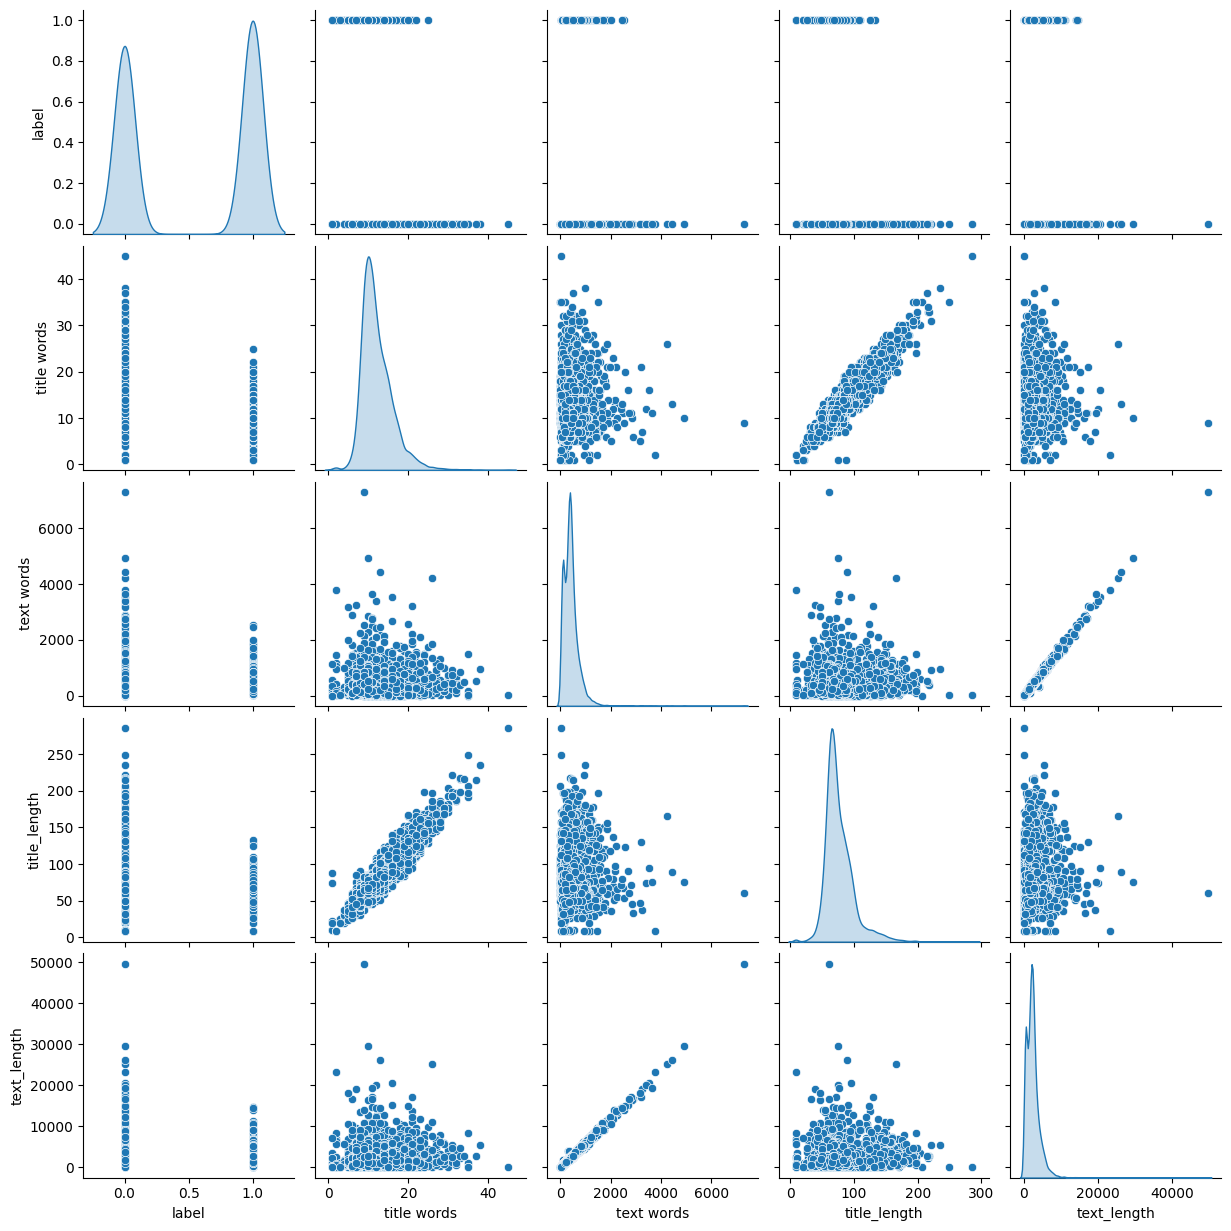

In [11]:
sns.pairplot(df.drop(['Unnamed: 0'], axis=1), diag_kind='kde')